In [3]:
import statistics
# %pip install numpy
# %pip install seaborn
import numpy as np
import seaborn as sns

Text(0.5, 1.0, 'Sample Plot')

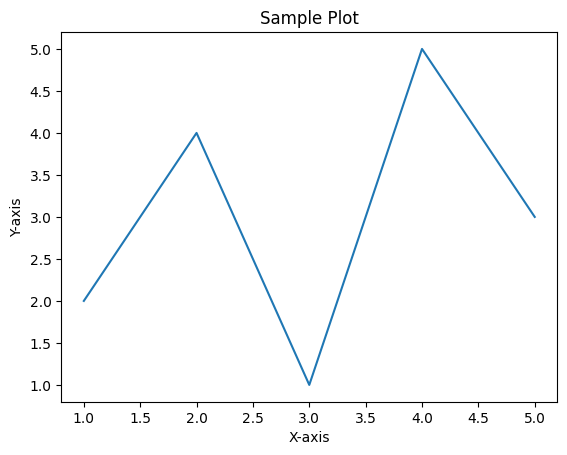

In [4]:
import matplotlib.pyplot as plt

# The magic command - Must be on its own line
%matplotlib inline 

# Create some sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

# Create a simple plot
plt.plot(x, y)

# Add labels and title (optional, but good practice)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample Plot")

# Display the plot -  Not strictly needed with %matplotlib inline
# plt.show()

In [5]:


df=sns.load_dataset('tips')

In [6]:
df.head()
df.describe()
statistics.mode(df['total_bill'])

13.42

<Axes: xlabel='day', ylabel='total_bill'>

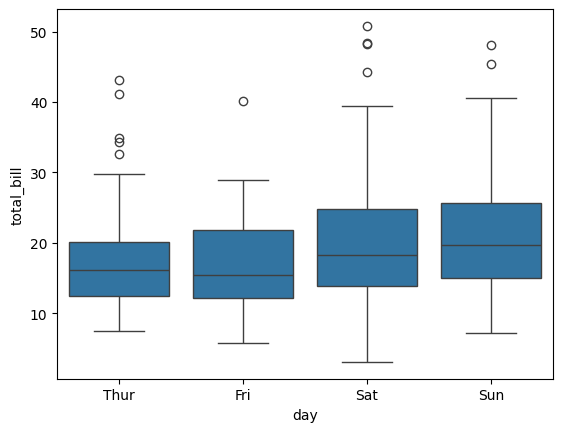

In [7]:
sns.boxplot(x='day', y='total_bill', data=df)

<Axes: xlabel='total_bill'>

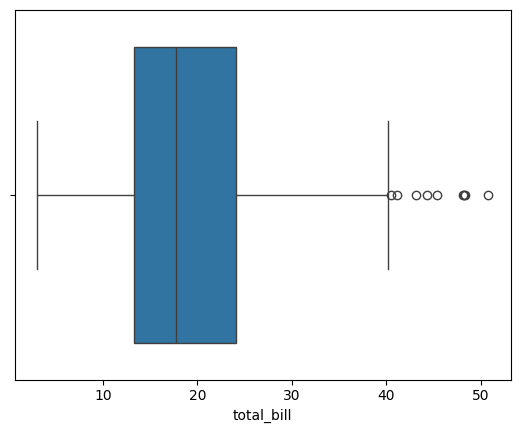

In [ ]:
sns.boxplot(df['total_bill'] ,orient='h')

<Axes: xlabel='total_bill', ylabel='Count'>

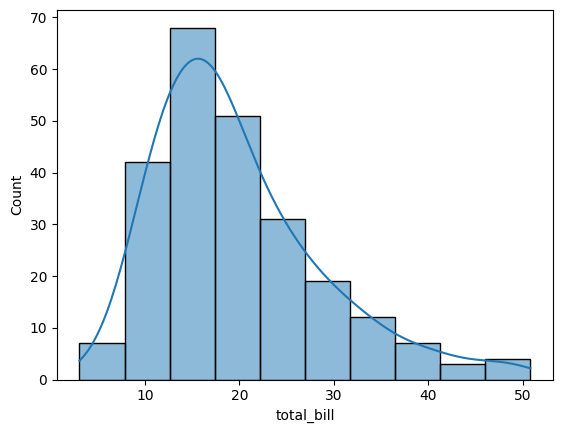

In [ ]:
sns.histplot(df['total_bill'], bins=10, kde=True)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

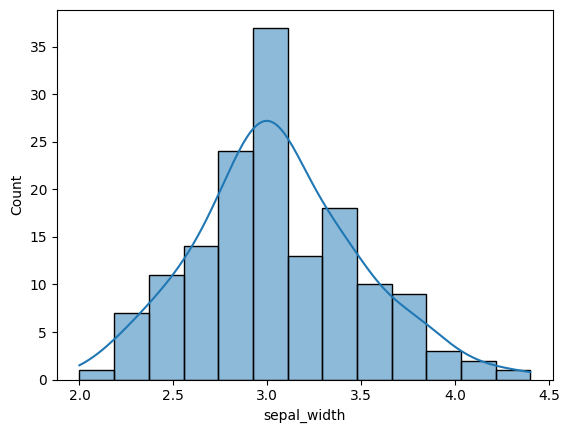

In [ ]:
df2=sns.load_dataset('iris')
print(df2.head())
sns.histplot(df2['sepal_width'], kde=True)


<Axes: xlabel='petal_length', ylabel='Count'>

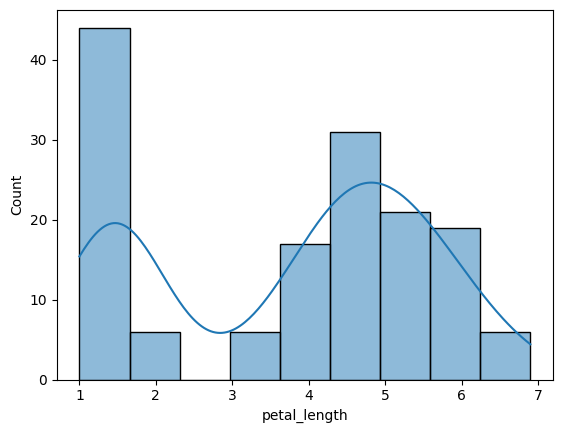

In [ ]:
sns.histplot(df2['petal_length'], kde=True)

In [ ]:
###  Outliers

In [ ]:
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
list_length = len(dataset)
print(list_length)  # Output: 5

34


In [ ]:
outliers = []
def detect_outlier(data_1):
    
    threshold=3 ## 3 standard deviation
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers 

outlier_datapoints = detect_outlier(dataset)
print(outliers)

[102, 107, 108]


(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

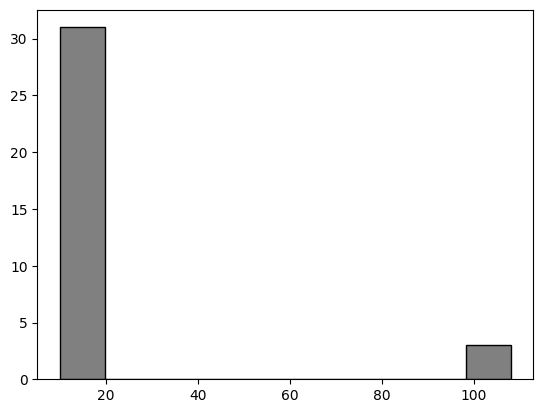

In [ ]:

plt.hist(dataset, bins=10, color='grey', edgecolor='black')

In [ ]:
#IQR
dataset.sort()
print(dataset)
q1, q3= np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 - q1
print(iqr)
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print(lower_bound,upper_bound)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]
12.0 15.0
3.0
7.5 19.5


<Axes: >

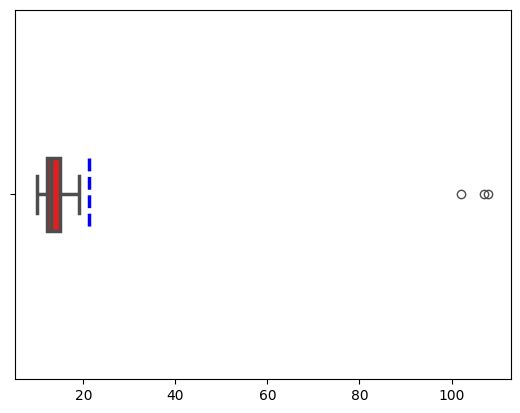

In [ ]:
sns.boxplot(dataset,orient='h',color='red',width=0.2,linewidth=2.5,whis=1.5,showmeans=True,meanline=True,meanprops={'color':'blue','linewidth':2.5})

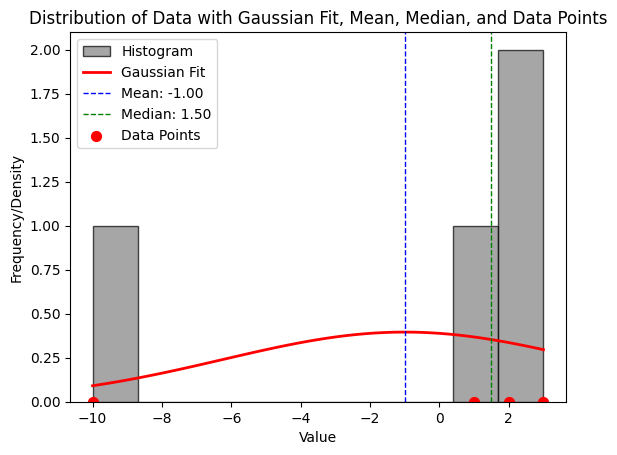

Mean: -1.00
Median: 1.50


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

lst = [-10, 1, 2, 3]

# Calculate mean and median
mean = np.mean(lst)
median = np.median(lst)

# Plot the histogram
plt.hist(lst, bins=10, color='grey', edgecolor='black', alpha=0.7, label='Histogram')

# Fit a Gaussian distribution
mu, sigma = stats.norm.fit(lst)
x = np.linspace(min(lst), max(lst), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the Gaussian curve
plt.plot(x, pdf * len(lst) * (max(x) - min(x)) / 10, 'r-', linewidth=2, label='Gaussian Fit')

# Plot mean and median lines
plt.axvline(mean, color='b', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')

# Plot the data points (scatter plot)
plt.scatter(lst, np.zeros_like(lst), color='r', marker='o', s=100, label='Data Points') #s controls size of the points


plt.title('Distribution of Data with Gaussian Fit, Mean, Median, and Data Points')
plt.xlabel('Value')
plt.ylabel('Frequency/Density') #y-axis label updated to show it represents frequency and density
plt.legend()
plt.show()

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")

In this specific dataset [-10, 1, 2, 3], the mean (-1.00) is significantly lower than the median (1.50). This suggests that the data is skewed to the left (negatively skewed). The outlier (-10) pulls the mean towards the lower values, while the median remains less affected by extreme values.

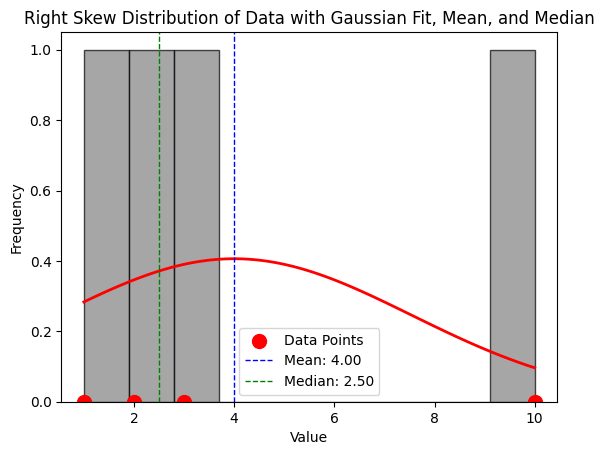

Mean: 4.00
Median: 2.50


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

lst = [1, 2, 3, 10.]

# Calculate mean and median
mean = np.mean(lst)
median = np.median(lst)

# Plot the histogram
plt.hist(lst, bins=10, color='grey', edgecolor='black', alpha=0.7)

# Fit a Gaussian distribution
mu, sigma = stats.norm.fit(lst)
x = np.linspace(min(lst), max(lst), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the Gaussian curve
plt.plot(x, pdf * len(lst) * (max(x) - min(x)) / 10, 'r-', linewidth=2)
# Plot the data points (scatter plot)
plt.scatter(lst, np.zeros_like(lst), color='r', marker='o', s=100, label='Data Points') #s controls size of the points
# Plot mean and median lines
plt.axvline(mean, color='b', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')

plt.title('Right Skew Distribution of Data with Gaussian Fit, Mean, and Median')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")